<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05
Felipe Asbún, 202010509-K



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [379]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [380]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [381]:
print('NaN values en cada columna:')
for col in data.columns:
    print(col+':', data[col].isna().sum())

NaN values en cada columna:
sepal_length: 1
sepal_width: 1
petal_length: 1
petal_width: 1
species: 1


In [382]:
data.species = data.species.apply(lambda x: x if type(x)==str else 'default')
data.species = data.species.apply(lambda x: x.strip().lower())
data = data.convert_dtypes()

data.dtypes

sepal_length    Float64
sepal_width     Float64
petal_length    Float64
petal_width     Float64
species          string
dtype: object

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

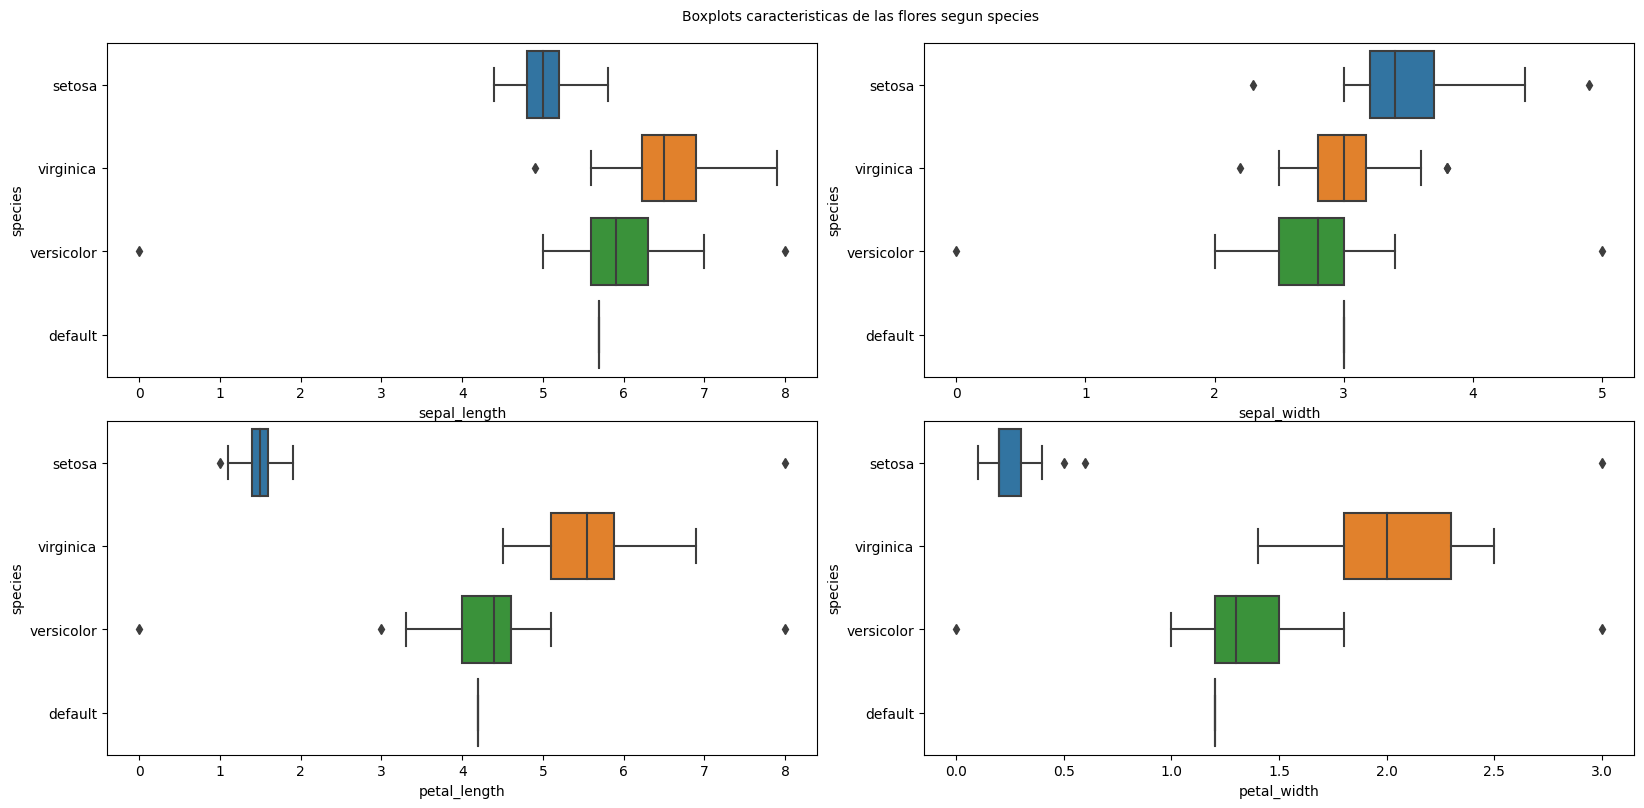

In [383]:
data.fillna(value=0, inplace=True)

fig, ax = plt.subplots(figsize=(16,8), nrows=2, ncols=2)
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig.suptitle('Boxplots caracteristicas de las flores segun species', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.15)
for i, col in enumerate(columns):
    sns.boxplot(
        data = data[['species', col]],
        x = col,
        y = 'species',
        ax = ax[i//2,i%2]
    )

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [384]:
# columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

valid_range = {
    'sepal_length': (4,7),
    'sepal_width': (2,4.5),
    'petal_length': (1,7),
    'petal_width': (0.1,2.5)
}
for col in valid_range:
    min = valid_range[col][0]
    max = valid_range[col][1]
    data['label'] = data[col].apply(lambda x: 'Out_of_range' if x<min or x>max else 'In_range')

data.loc[data['label']=='Out_of_range']

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,Out_of_range
58,6.3,2.5,8.0,3.0,versicolor,Out_of_range
99,5.8,2.7,4.1,0.0,versicolor,Out_of_range


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

<Axes: xlabel='sepal_width', ylabel='petal_width'>

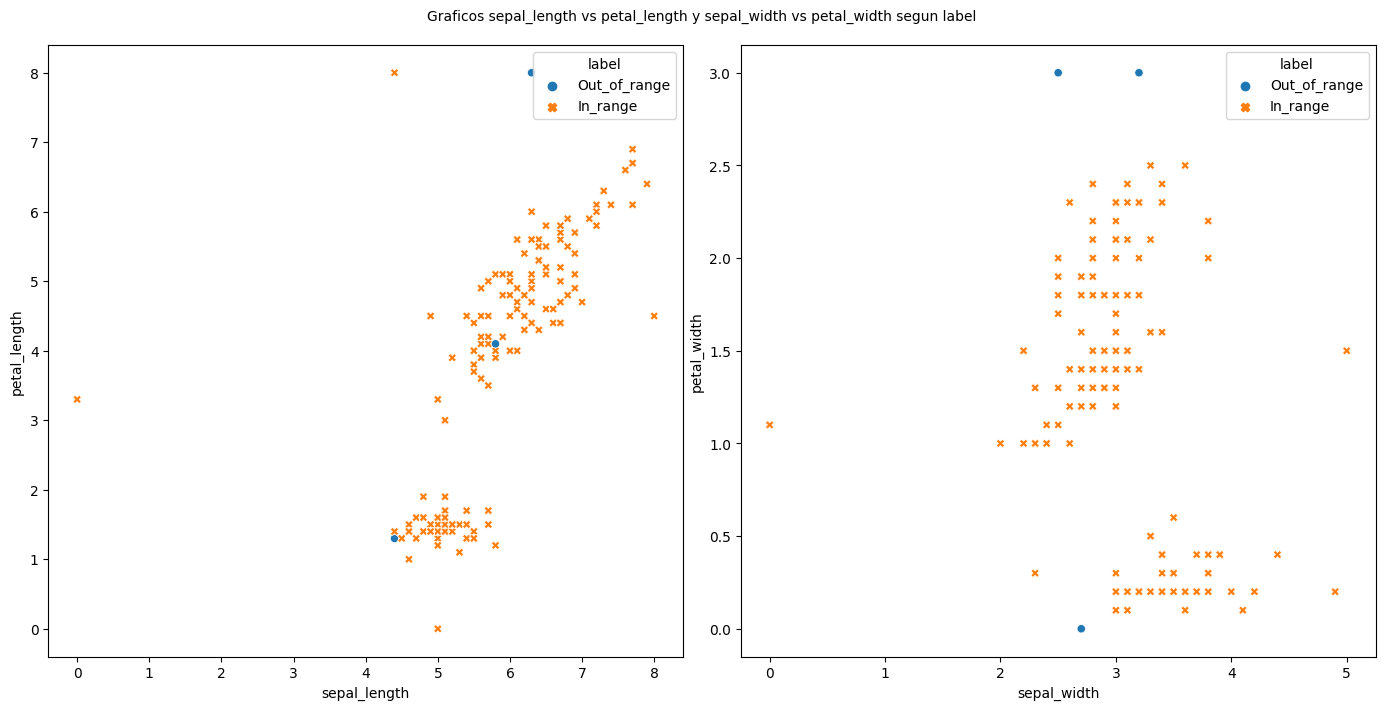

In [385]:
fig, ax = plt.subplots(figsize=(14,7), nrows=1, ncols=2)
fig.suptitle('Graficos sepal_length vs petal_length y sepal_width vs petal_width segun label', fontsize=10)
fig.tight_layout()

sns.scatterplot(
    data=data,
    x='sepal_length',
    y='petal_length',
    hue='label',
    style='label',
    ax=ax[0]
    )
sns.scatterplot(
    data=data,
    x='sepal_width',
    y='petal_width',
    hue='label',
    style='label',
    ax=ax[1]
    )

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

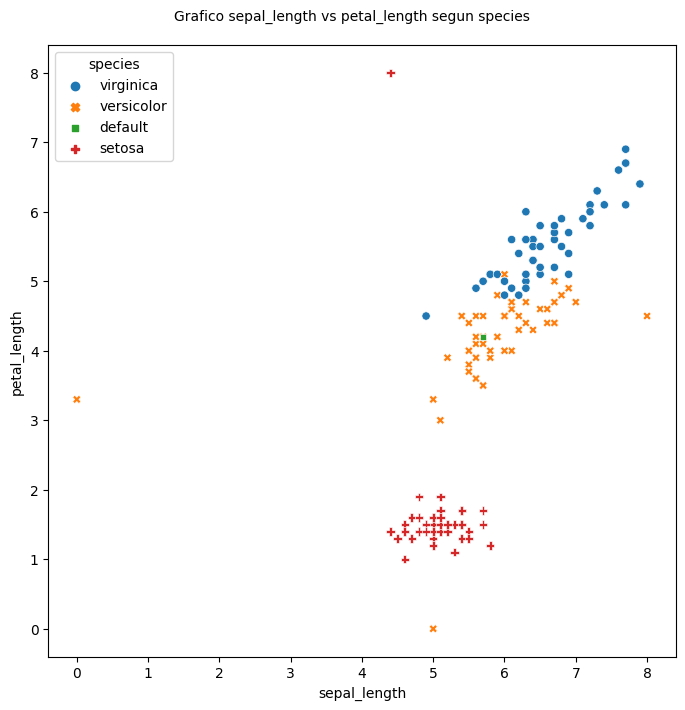

In [386]:
out_data = data.loc[data['label']=='Out_of_range'].index.tolist()
data.drop(out_data, inplace=True)

fig, ax = plt.subplots(figsize=(7,7), nrows=1, ncols=1)
fig.suptitle('Grafico sepal_length vs petal_length segun species', fontsize=10)
fig.tight_layout()
sns.scatterplot(
    data=data,
    x='sepal_length',
    y='petal_length',
    hue='species',
    style='species',
    ax=ax
    )